In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
from sklearn import neighbors
from sklearn import ensemble

In [140]:
#https://www.kaggle.com/thansnet/phone-datas
df = pd.read_csv('phone_data.csv')
df.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [141]:
#date is currently a string, convert that to day/hour/minute columns
df['dateobj'] = [datetime.datetime.strptime(x, "%d/%m/%y %H:%M") for x in df.date]
df['hour'] = [x.hour for x in df.dateobj]
df['day'] = [x.day for x in df.dateobj]
df['minute'] = [x.minute for x in df.dateobj]
df = df.drop(['index', 'dateobj'], axis=1)

In [142]:
df.head()

,date,duration,item,month,network,network_type,hour,day,minute
0,15/10/14 06:58,34.429,data,2014-11,data,data,6,15,58
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,6,15,58
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,14,15,46
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,14,15,48
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,17,15,27


In [143]:
#let's limit to calls under 5 hours
df = df[(df.duration<300) & (df.item == 'call')]
#df = df[df.item == 'call']
print(df.shape)

(303, 9)


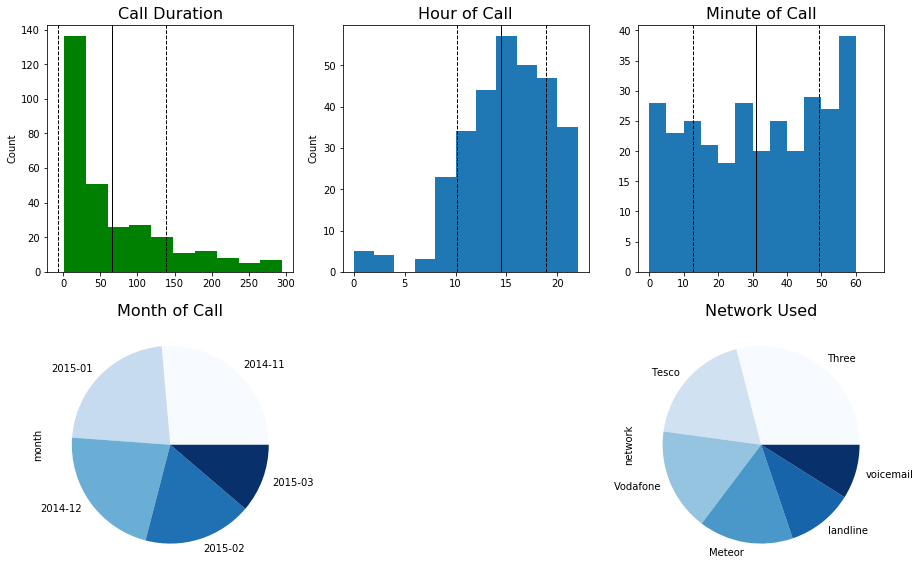

In [144]:
#add vertical lines for mean/std

plt.figure(figsize=[15,10])
plt.subplot(231)
plt.ylabel('Count')
plt.title('Call Duration', fontsize=16)
plt.axvline(df['duration'].mean(), color='k', linestyle='solid', linewidth=1)
plt.axvline(df['duration'].mean() - df.duration.std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['duration'].mean() + df.duration.std(), color='k', linestyle='dashed', linewidth=1)
plt.hist(df['duration'], bins=10, color='g')
plt.subplot(232)
plt.hist(df.hour, bins=range(0,24,2))
plt.axvline(df.hour.mean(), color='k', linestyle='solid', linewidth=1)
plt.axvline(df.hour.mean() - df.hour.std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.hour.mean() + df.hour.std(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Count')
plt.title('Hour of Call', fontsize=16)
plt.subplot(233)
plt.ylabel('Count')
plt.title('Minute of Call', fontsize=16)
plt.hist(df.minute, bins=range(0,70,5))
plt.axvline(df.minute.mean(), color='k', linestyle='solid', linewidth=1)
plt.axvline(df.minute.mean() - df.minute.std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.minute.mean() + df.minute.std(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('')

plt.subplot(234)
plt.title('Month of Call', fontsize=16)

df['month'].value_counts().plot(kind='pie', cmap='Blues')
plt.subplot(236)
plt.ylabel('')
plt.title('Network Used', fontsize=16)
df['network'].value_counts().plot(kind='pie', cmap='Blues')
plt.show()

# Can I predict the time spent on the phone using just the hour of the day?

In [145]:
regr = linear_model.LinearRegression()
x = df.hour
y = df.duration
regr.fit(pd.DataFrame(x),y)
scores = cross_val_score(regr,pd.DataFrame(x),y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\nCoefficients:', regr.coef_)
print('\nIntercept: \n', regr.intercept_)

Fold Scores:  [-0.08499935 -0.10345528 -0.00518435 -0.00953306 -0.00731144 -0.08964959
  0.00100324 -0.04242235 -0.03363981 -0.10477098]

Average Score:  -0.047996295527909225

Coefficients: [0.80744851]

Intercept: 
 54.167793600678365


In [146]:
#statsmodels
linear_formula = 'duration ~ hour'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7127
Date:                Fri, 28 Dec 2018   Prob (F-statistic):              0.399
Time:                        17:28:28   Log-Likelihood:                -1726.0
No. Observations:                 303   AIC:                             3456.
Df Residuals:                     301   BIC:                             3463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.1678     14.491      3.738      0.000      25.652      82.683
hour           0.8074      0.956      0.844      0.399      -1.075       2.690
==============================================================================
Omnibus:                       62.838   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.401
Skew:                           1.304   Prob(JB):                     1.17e-21
Kurtosis:                       3.911   Cond. No.                         53.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What if we use minute as well?

In [113]:
linear_formula = 'duration ~ hour+minute'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5528
Date:                Fri, 28 Dec 2018   Prob (F-statistic):              0.576
Time:                        14:33:24   Log-Likelihood:                -1725.8
No. Observations:                 303   AIC:                             3458.
Df Residuals:                     300   BIC:                             3469.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6045     16.223      3.058      0.002      17.678      81.531
hour           0.8181      0.958      0.854      0.394      -1.066       2.702
minute         0.1420      0.226      0.628      0.530      -0.303       0.587
==============================================================================
Omnibus:                       63.148   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.101
Skew:                           1.308   Prob(JB):                     8.22e-22
Kurtosis:                       3.920   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It feels intuitively that there should be some pattern here, at least without the outliers in this dataset. However, it's a poisson distribution, and there aren't  that many samples. Neither of our p-values leave me confident that there's no pattern here.

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


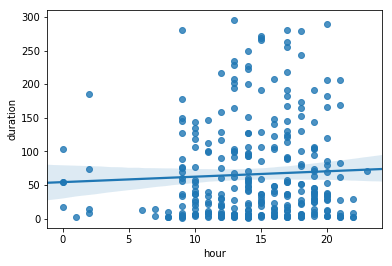

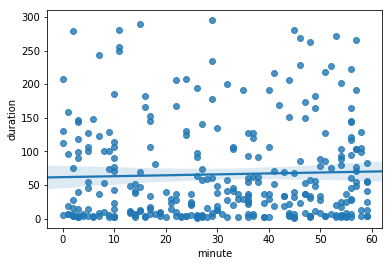

In [114]:
sns.regplot(x='hour', y='duration', data=df)
plt.show()
sns.regplot(x='minute', y='duration', data=df)
plt.show()

In [115]:
#add booleans for network and month
monthvals = {'2014-11': 'nov',
             '2014-12': 'dec',
             '2015-01': 'jan',
             '2015-02': 'feb',
             '2015-03': 'mar'}
df = df.replace({'month':monthvals})
df2 = pd.get_dummies(df, columns=['network', 'month'])
df2.head()

,date,duration,item,network_type,hour,day,minute,network_Meteor,network_Tesco,network_Three,network_Vodafone,network_landline,network_voicemail,month_dec,month_feb,month_jan,month_mar,month_nov
1,15/10/14 06:58,13.0,call,mobile,6,15,58,0,0,0,1,0,0,0,0,0,0,1
2,15/10/14 14:46,23.0,call,mobile,14,15,46,1,0,0,0,0,0,0,0,0,0,1
3,15/10/14 14:48,4.0,call,mobile,14,15,48,0,1,0,0,0,0,0,0,0,0,1
4,15/10/14 17:27,4.0,call,mobile,17,15,27,0,1,0,0,0,0,0,0,0,0,1
5,15/10/14 18:55,4.0,call,mobile,18,15,55,0,1,0,0,0,0,0,0,0,0,1


# Why are the below different?

In [150]:
regr = linear_model.LinearRegression(fit_intercept=True)
x = df2[['hour','minute','network_Meteor','network_Tesco','network_Three','network_Vodafone','network_landline',
         'network_voicemail','month_nov','month_dec','month_jan','month_feb','month_mar']]
y = df2.duration
regr.fit(x,y)
scores = cross_val_score(regr,x,y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\nCoefficients:', regr.coef_)
print('\nIntercept: \n', regr.intercept_)

linear_formula = 'duration ~ hour+minute+network_Meteor+network_Tesco+network_Three+network_Vodafone+network_landline+network_voicemail+month_nov+month_dec+month_jan+month_feb+month_mar'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df2).fit()
lm.summary()

Fold Scores:  [-0.17035507 -0.17746158  0.02172376  0.02784413 -0.02646473 -0.10482344
 -0.05273384  0.07736338  0.11459316  0.05383883]

Average Score:  -0.02364753898590276

Coefficients: [-2.10187507e-02  1.17891343e-01  6.38596703e+00  2.95635955e+01
 -1.39429530e+01 -1.43018554e+01 -5.13553555e+00 -2.56921859e+00
 -1.49137575e+01 -4.89853166e+00 -2.98973464e+00  9.62282564e+00
  1.31791982e+01]

Intercept: 
 65.72442874916266


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.186
Date:                Fri, 28 Dec 2018   Prob (F-statistic):             0.0152
Time:                        17:39:12   Log-Likelihood:                -1714.3
No. Observations:                 303   AIC:                             3453.
Df Residuals:                     291   BIC:                             3497.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            48.0910     12.182      3.948      0.000      24.114      72.068
hour                 -0.0210      0.969     -0.022      0.983      -1.929       1.887
minute                0.1179      0.228      0.517      0.605      -0.331       0.566
network_Meteor       14.4011      9.987      1.442      0.150      -5.255      34.057
network_Tesco        37.5788      9.541      3.939      0.000      18.801      56.356
network_Three        -5.9278      7.936     -0.747      0.456     -21.546       9.691
network_Vodafone     -6.2867      9.293     -0.676      0.499     -24.577      12.004
network_landline      2.8796     11.262      0.256      0.798     -19.286      25.045
network_voicemail     5.4460     12.368      0.440      0.660     -18.897      29.789
month_nov            -5.2955      7.962     -0.665      0.507     -20.967      10.375
month_dec             4.7197      8.154      0.579      0.563     -11.328      20.767
month_jan             6.6285      8.191      0.809      0.419      -9.493      22.750
month_feb            19.2410      9.159      2.101      0.037       1.214      37.268
month_mar            22.7974     11.265      2.024      0.044       0.627      44.968
==============================================================================
Omnibus:                       59.038   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.200
Skew:                           1.238   Prob(JB):                     7.04e-20
Kurtosis:                       3.923   Cond. No.                     3.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

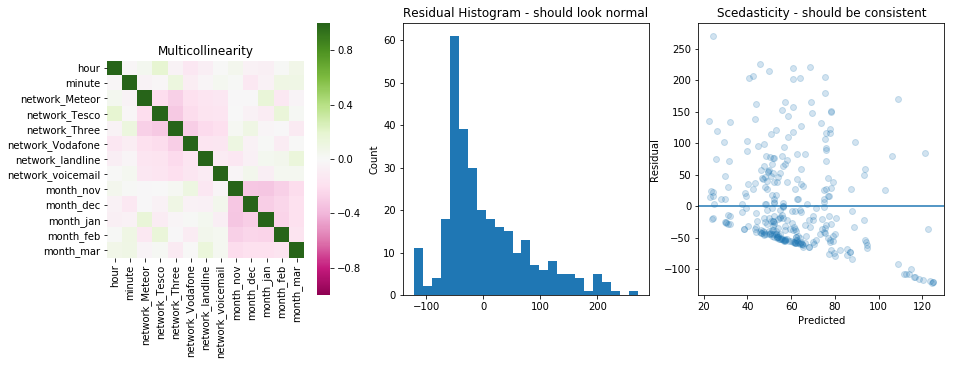

In [125]:
#Let's check how our output looks:
pred = cross_val_predict(regr,x,y,cv=3)
residual = y - pred

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('Multicollinearity')
sns.heatmap(x.corr(), vmin = -1,square=True, cmap="PiYG")
plt.subplot(132)
plt.hist(residual, bins=25)
plt.title('Residual Histogram - should look normal')
plt.ylabel('Count')
plt.subplot(133)
plt.scatter(pred, residual, alpha=.2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Scedasticity - should be consistent')
plt.show()
#annotate charts? sample#, output std, modeled std

---

In [171]:
x = df2[['hour','minute','network_Meteor','network_Tesco','network_Three','network_Vodafone','network_landline','network_voicemail','month_nov','month_dec','month_jan','month_feb','month_mar']]
y = df2.duration
nns = 35
knn = neighbors.KNeighborsRegressor(n_neighbors=nns, weights='distance')
knn.fit(x,y)
scores = cross_val_score(knn,x,y,cv=3)
print("KNN: ",scores)
print("\nAverage Score with "+str(nns)+" neighbors: ",np.mean(scores))
print('\n','-'*40)

rfr = ensemble.RandomForestRegressor(n_estimators=10, max_depth=2)
rfr.fit(x,y)
scores = cross_val_score(rfr,x,y,cv=3)
print("Random Forest Regressor: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\n','-'*40)

gbr = ensemble.GradientBoostingRegressor(learning_rate=.1, max_depth=2, n_estimators=100)
gbr.fit(x,y)
scores = cross_val_score(gbr,x,y,cv=3)
print("Gradient-Boosted Regressor: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\n','-'*40)


KNN:  [-0.13352325 -0.06097083 -0.10020741]

Average Score with 35 neighbors:  -0.09823383144492803

 ----------------------------------------
Random Forest Regressor:  [-0.24071307 -0.00673637  0.00242094]

Average Score:  -0.0816761697604476

 ----------------------------------------
Gradient-Boosted Regressor:  [-0.26581816 -0.24818658 -0.1386667 ]

Average Score:  -0.21755714733851397

 ----------------------------------------


In [172]:
#Let's try it with only the features where p<=.2 from statsmodels
x = df2[['hour','minute','network_Tesco','network_Meteor','month_feb','month_mar']]
nns = 35
knn = neighbors.KNeighborsRegressor(n_neighbors=nns, weights='distance')
knn.fit(x,y)
scores = cross_val_score(knn,x,y,cv=3)
print("KNN: ",scores)
print("\nAverage Score with "+str(nns)+" neighbors: ",np.mean(scores))
print('\n','-'*40)

rfr = ensemble.RandomForestRegressor(n_estimators=10, max_depth=2)
rfr.fit(x,y)
scores = cross_val_score(rfr,x,y,cv=10)
print("Random Forest Regressor: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\n','-'*40)

gbr = ensemble.GradientBoostingRegressor(learning_rate=.1, max_depth=2, n_estimators=100)
gbr.fit(x,y)
scores = cross_val_score(gbr,x,y,cv=10)
print("Gradient-Boosted Regressor: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\n','-'*40)

KNN:  [-0.13300736 -0.10483573 -0.10813782]

Average Score with 35 neighbors:  -0.11532696794064641

 ----------------------------------------
Random Forest Regressor:  [-0.16209918 -0.38447011 -0.0113352  -0.02811082  0.03463409 -0.09590391
  0.02920252  0.05755872  0.14711563 -0.06175761]

Average Score:  -0.047516587557551934

 ----------------------------------------
Gradient-Boosted Regressor:  [-0.38962232 -0.24063617  0.11722995 -0.10733878 -0.04166999 -0.33849674
 -0.10029844 -0.14526482  0.07528502  0.08290984]

Average Score:  -0.1087902448871878

 ----------------------------------------


In [151]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py
from sklearn.preprocessing import QuantileTransformer, quantile_transform

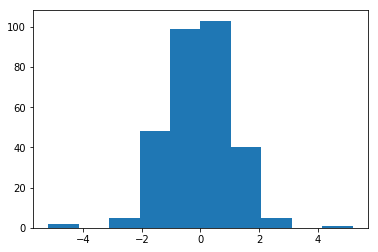

In [154]:
y_trans = quantile_transform(pd.DataFrame(y),output_distribution='normal').squeeze()
plt.hist(y_trans)
plt.show()

In [156]:
regr.fit(x,y_trans)
scores = cross_val_score(regr,x,y_trans,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\nCoefficients:', regr.coef_)
print('\nIntercept: \n', regr.intercept_)


Fold Scores:  [-0.24171178 -0.19705869 -0.01267219 -0.02101727 -0.05630893 -0.12894298
 -0.00596038 -0.00716276  0.1563111   0.04654691]

Average Score:  -0.04679769763360249

Coefficients: [ 0.0032197   0.0022447  -0.02553255  0.35100997 -0.21327614 -0.12652768
  0.0256604  -0.011334   -0.29374682 -0.06909487  0.03452224  0.11781837
  0.21050108]

Intercept: 
 -0.06170157578813314


In [157]:
df2['ytrans'] = y_trans

In [158]:

linear_formula = 'y_trans ~ hour+minute+network_Meteor+network_Tesco+network_Three+network_Vodafone+network_landline+network_voicemail+month_nov+month_dec+month_jan+month_feb+month_mar'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_trans   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.881
Date:                Fri, 28 Dec 2018   Prob (F-statistic):             0.0414
Time:                        17:45:25   Log-Likelihood:                -445.98
No. Observations:                 303   AIC:                             916.0
Df Residuals:                     291   BIC:                             960.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0451      0.185     -0.244      0.808      -0.410       0.319
hour                  0.0032      0.015      0.218      0.827      -0.026       0.032
minute                0.0022      0.003      0.648      0.518      -0.005       0.009
network_Meteor       -0.0331      0.152     -0.218      0.828      -0.332       0.266
network_Tesco         0.3435      0.145      2.368      0.019       0.058       0.629
network_Three        -0.2208      0.121     -1.830      0.068      -0.458       0.017
network_Vodafone     -0.1341      0.141     -0.949      0.344      -0.412       0.144
network_landline      0.0181      0.171      0.106      0.916      -0.319       0.355
network_voicemail    -0.0189      0.188     -0.100      0.920      -0.389       0.351
month_nov            -0.3028      0.121     -2.501      0.013      -0.541      -0.064
month_dec            -0.0781      0.124     -0.630      0.529      -0.322       0.166
month_jan             0.0255      0.125      0.205      0.838      -0.220       0.271
month_feb             0.1088      0.139      0.781      0.435      -0.165       0.383
month_mar             0.2015      0.171      1.176      0.240      -0.136       0.539
==============================================================================
Omnibus:                       40.614   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.876
Skew:                          -0.247   Prob(JB):                     1.23e-55
Kurtosis:                       7.448   Cond. No.                     3.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

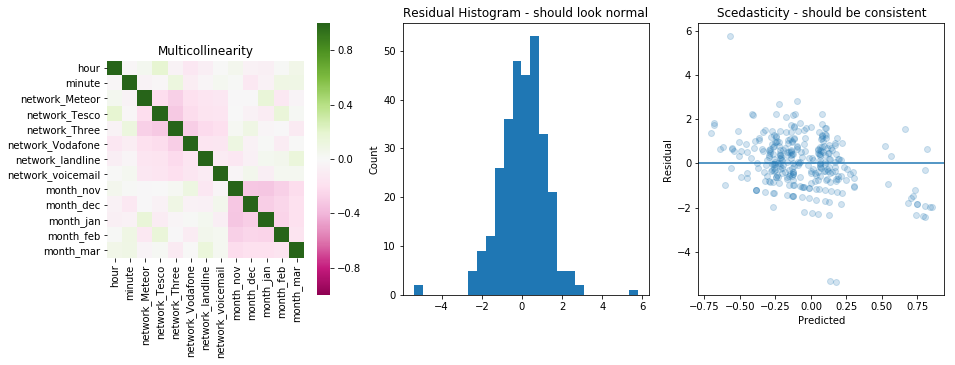

In [160]:
pred = cross_val_predict(regr,x,y_trans,cv=3)
residual = y_trans - pred

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('Multicollinearity')
sns.heatmap(x.corr(), vmin = -1,square=True, cmap="PiYG")
plt.subplot(132)
plt.hist(residual, bins=25)
plt.title('Residual Histogram - should look normal')
plt.ylabel('Count')
plt.subplot(133)
plt.scatter(pred, residual, alpha=.2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Scedasticity - should be consistent')
plt.show()

In [ ]:
#PCA that? "MCA" Multiple Correspondents Analysis